In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import statsmodels.stats.multitest
#sys.path.append('C:\\Users\\brittany\\henderson\\GitHub\\GBM_for_CPTAC\\')
#import cis_functions as f
#sys.path.append('C:\\Users\\Lindsey\\Documents\\GitHub\\WhenMutationsDontMatter\\')
#import plot_utils as p


import cptac
import cptac.utils as u

In [104]:
df = pd.read_csv("pancan_EGFR.csv")
df = df.drop(['Unnamed: 0'], axis=1)
#filtered_data = df[df["Comparison"]== "ARG1"]
#df["SD_slope"] = (df.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc","Slope_colon"]].std(axis = 1))

df_rsquared = df.loc[:,["Comparison","R_squared_gbm","R_squared_kidney","R_squared_Endo","R_squared_Ovar","R_squared_Brca","R_squared_Luad","R_squared_hnscc","R_squared_colon"]].dropna(thresh = 6)
#df["SD_pvalue"] = (df.loc[:,["Comparison","P_value_Gbm","P_value_kidney","P_value_Endo","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon"]].std(axis = 1))df_slope.nlargest(20, 'SD_slope')
df_rsquared.nlargest(20, 'R_squared_colon')

,Comparison,R_squared_gbm,R_squared_kidney,R_squared_Endo,R_squared_Ovar,R_squared_Brca,R_squared_Luad,R_squared_hnscc,R_squared_colon
0,EGFR_proteomics,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
202,RASGRP2_proteomics,0.082229,2.603252e-02,0.009910,0.003611,0.040793,0.223916,0.163748,0.539949
963,CXCL8_proteomics,0.001723,2.824896e-02,0.002014,NaN,NaN,0.007283,0.000069,0.371681
1038,UBE2T_proteomics,0.000117,6.153973e-04,0.197619,0.190838,0.000560,0.018838,0.000998,0.296995
302,MAP3K11_proteomics,0.062510,2.500715e-02,0.032470,0.005837,0.000002,0.000186,0.001375,0.248762
18,PIK3CD_proteomics,0.217403,3.559006e-02,0.002523,0.044581,0.009803,0.110065,0.032353,0.225794
343,SLC39A10_proteomics,0.049904,7.053879e-03,0.140291,0.006081,0.007171,0.001082,0.019805,0.225794
1107,TCL1A_proteomics,NaN,3.427140e-02,0.054221,0.072216,0.001033,NaN,0.053241,0.225794
595,PPP2R5D_proteomics,0.017925,7.059010e-02,0.012842,0.009485,0.000422,NaN,0.002239,0.207126
1093,TNS4_proteomics,NaN,5.440428e-02,NaN,NaN,0.065411,0.031992,0.118827,0.203083


In [47]:
df_slope = df.loc[:,["Comparison","Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc","Slope_colon"]]
df_slope = df_slope.dropna(thresh = 6)
df_slope["SD_slope"] = (df_slope.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc","Slope_colon"]].std(axis = 1))
df_slope.nlargest(20, 'SD_slope')

,Comparison,Slope_Gbm,Slope_kidney,Slope_Endo,Slope_Ovar,Slope_Brca,Slope_Luad,Slope_hnscc,Slope_colon,SD_slope
662,CCL20_proteomics,-0.103641,0.294866,-0.130679,4.776092,NaN,-0.302016,-0.431107,0.520713,1.844778
1229,WNT2_proteomics,NaN,NaN,0.272080,NaN,0.125108,-0.102458,-0.030702,-3.606696,1.648840
962,CXCL8_proteomics,0.034434,-2.358999,0.090605,NaN,NaN,-0.161652,0.010163,2.104210,1.415276
1073,ENPP3_proteomics,NaN,1.082711,0.064149,1.768513,0.572705,0.455479,-1.674461,NaN,1.164917
1208,ZFP36_proteomics,NaN,0.037995,-0.142051,NaN,0.192326,-0.200625,0.083625,-2.797105,1.148805
511,PDE4B_proteomics,0.042670,-1.988308,0.039243,-0.971230,NaN,NaN,0.213994,NaN,0.938992
780,GFAP_proteomics,0.047655,NaN,0.358516,0.493343,0.439710,NaN,-0.053617,2.399939,0.901803
412,VCAN_proteomics,0.148632,-2.289843,-0.010306,0.244773,0.001634,-0.004112,0.178238,-0.228046,0.839180
557,PDGFC_proteomics,-0.040377,-1.976280,0.090366,0.146996,0.289268,0.056121,0.102982,NaN,0.793879
300,CXCL10_proteomics,0.175025,-1.649186,-0.344409,-0.081025,0.540631,-0.127802,-0.179193,-1.576360,0.791670


In [48]:
df_pvalue = df.loc[:,["Comparison","P_value_Gbm","P_value_kidney","P_value_Endo","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon"]]
df_pvalue= df_pvalue.dropna(thresh = 6)
df_pvalue["SD_pvalue"] = (df_pvalue.loc[:,["Comparison","P_value_Gbm","P_value_kidney","P_value_Endo","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon"]].std(axis = 1))
df_pvalue.nlargest(20, 'SD_pvalue')

,Comparison,P_value_Gbm,P_value_kidney,P_value_Endo,P_value_Ovar,P_value_Brca,P_value_Luad,P_value_hnscc,P_value_colon,SD_pvalue
281,TSG101_proteomics,1.483545e-02,0.087110,9.942719e-01,0.057452,2.490800e-02,NaN,0.668051,0.996519,0.462757
287,CES1_proteomics,1.562172e-02,0.246737,9.801090e-01,0.979805,2.480889e-02,0.037804,0.847743,0.869520,0.456130
153,PRKCQ_proteomics,1.503614e-03,0.906564,9.026307e-01,0.175757,9.839887e-01,0.000005,0.002719,0.153727,0.453113
460,TGFBR3_proteomics,8.615268e-02,0.045818,7.347687e-01,0.955760,9.855406e-01,0.030063,0.072853,NaN,0.452744
249,STOM_proteomics,8.818376e-03,0.953190,3.469413e-02,0.408071,2.292748e-01,0.985358,0.959198,0.000523,0.450185
891,GYS1_proteomics,6.640673e-01,0.000001,9.390604e-01,0.037870,3.865325e-04,0.889905,0.873870,0.054356,0.445093
900,PPP1R14C_proteomics,6.768017e-01,0.652278,9.328513e-01,0.955204,1.825316e-04,0.007462,0.001233,NaN,0.443372
9,SOX9_proteomics,2.524741e-07,0.961175,4.650252e-02,0.387685,6.389000e-03,NaN,0.015042,0.949508,0.443140
77,ACTR2_proteomics,1.195961e-04,NaN,9.908794e-01,0.936050,1.139875e-05,0.037750,0.140653,0.549547,0.442386
1046,TNXB_proteomics,9.448261e-01,0.057987,3.873741e-02,0.005320,9.929931e-01,0.000480,0.000396,0.011011,0.440379


In [61]:
df1_merged1 = df_slope.merge(df_pvalue, on='Comparison')
df1_merged1 = df1_merged1.sort_values(by = ['SD_pvalue'])
df1_merged1["ranking_pvalue"] = range(len(df1_merged1))
df1_merged1

,Comparison,Slope_Gbm,Slope_kidney,Slope_Endo,Slope_Ovar,Slope_Brca,Slope_Luad,Slope_hnscc,Slope_colon,SD_slope,P_value_Gbm,P_value_kidney,P_value_Endo,P_value_Ovar,P_value_Brca,P_value_Luad,P_value_hnscc,P_value_colon,SD_pvalue,ranking_pvalue
0,EGFR_proteomics,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0
940,VIL1_proteomics,NaN,-0.676758,-0.380846,NaN,NaN,-0.335205,-0.477716,-0.503214,0.132209,NaN,0.000185,0.091569,NaN,NaN,0.065450,2.576962e-03,0.001048,0.043310,1
53,CAV1_proteomics,-0.247115,0.652394,0.741885,0.476596,0.244297,-0.116226,0.125267,0.284034,0.348459,2.766397e-05,0.000224,0.000005,0.068828,0.045787,0.093581,3.084937e-02,0.136803,0.050108,2
1,GRB2_proteomics,-0.144746,-0.139721,-0.242075,-0.163008,-0.103359,-0.117969,-0.139484,0.148896,0.113572,1.886384e-11,0.022506,0.000009,0.085202,0.057899,0.001321,2.559824e-09,0.139949,0.052007,3
90,HK3_proteomics,-0.203058,-0.286539,-0.237885,0.338274,0.453427,-0.090484,-0.072889,0.299600,0.292328,3.109417e-04,0.043294,0.080008,0.005338,0.000001,0.173419,1.136088e-01,0.068609,0.061690,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,STOM_proteomics,-0.105098,0.008329,0.283693,0.133921,0.100863,0.000906,-0.002003,0.445011,0.178918,8.818376e-03,0.953190,0.034694,0.408071,0.229275,0.985358,9.591985e-01,0.000523,0.450185,975
413,TGFBR3_proteomics,0.073421,-0.235054,-0.048527,0.009037,0.002065,-0.172409,-0.099753,NaN,0.108809,8.615268e-02,0.045818,0.734769,0.955760,0.985541,0.030063,7.285345e-02,NaN,0.452744,976
140,PRKCQ_proteomics,-0.110154,0.015586,-0.017176,-0.167010,-0.002042,-0.224358,-0.159441,0.876651,0.354406,1.503614e-03,0.906564,0.902631,0.175757,0.983989,0.000005,2.719128e-03,0.153727,0.453113,977
261,CES1_proteomics,-0.143797,-1.010190,-0.005006,0.006135,0.309563,-0.199571,-0.024180,-0.033659,0.383062,1.562172e-02,0.246737,0.980109,0.979805,0.024809,0.037804,8.477426e-01,0.869520,0.456130,978


In [66]:

df1_merged1 = df1_merged1.sort_values(by = ['SD_slope'])
df1_merged1["ranking_slope"] = range(len(df1_merged1))
df1_merged1

,Comparison,Slope_Gbm,Slope_kidney,Slope_Endo,Slope_Ovar,Slope_Brca,Slope_Luad,Slope_hnscc,Slope_colon,SD_slope,...,P_value_kidney,P_value_Endo,P_value_Ovar,P_value_Brca,P_value_Luad,P_value_hnscc,P_value_colon,SD_pvalue,ranking_pvalue,ranking_slope
0,EGFR_proteomics,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
239,VPS11_proteomics,-0.027740,-0.019795,0.005953,-0.004613,-0.024318,-0.033305,-0.039258,-0.053154,0.018792,...,5.456484e-01,0.870133,0.923694,0.444720,0.059944,0.018259,0.418349,0.364514,788,1
729,VPS4A_proteomics,0.006447,0.043482,-0.042476,0.026405,-0.012000,0.010200,-0.020247,0.010712,0.027105,...,4.556509e-01,0.334795,0.754014,0.722670,0.739104,0.403377,0.815779,0.184726,96,2
231,PTPN11_proteomics,0.045309,0.015502,-0.002139,0.005537,-0.049868,-0.024490,-0.013371,0.010008,0.028464,...,8.555957e-01,0.956943,0.931582,0.147133,0.324697,0.471469,0.815404,0.375009,823,3
736,TBK1_proteomics,-0.005501,-0.034876,0.004425,-0.090413,NaN,-0.014542,-0.037443,0.015634,0.035394,...,2.807322e-01,0.894243,0.359025,NaN,0.601587,0.019122,0.791796,0.303472,492,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,ZFP36_proteomics,NaN,0.037995,-0.142051,NaN,0.192326,-0.200625,0.083625,-2.797105,1.148805,...,8.140599e-01,0.052302,NaN,0.033739,0.002983,0.179489,0.088679,0.309198,515,975
937,ENPP3_proteomics,NaN,1.082711,0.064149,1.768513,0.572705,0.455479,-1.674461,NaN,1.164917,...,3.278203e-10,0.752033,0.072414,0.000385,0.001038,0.211021,NaN,0.295343,448,976
840,CXCL8_proteomics,0.034434,-2.358999,0.090605,NaN,NaN,-0.161652,0.010163,2.104210,1.415276,...,2.541713e-01,0.683419,NaN,NaN,0.506024,0.933778,0.000166,0.346826,703,977
977,WNT2_proteomics,NaN,NaN,0.272080,NaN,0.125108,-0.102458,-0.030702,-3.606696,1.648840,...,NaN,0.024311,NaN,0.315749,0.213382,0.870720,0.133583,0.330342,609,978


In [72]:
df1_merged1["ranking_slope+pvalue"] = df1_merged1["ranking_slope"] + df1_merged1["ranking_pvalue"]
df1_merged1.nlargest(20,"ranking_slope+pvalue")

,Comparison,Slope_Gbm,Slope_kidney,Slope_Endo,Slope_Ovar,Slope_Brca,Slope_Luad,Slope_hnscc,Slope_colon,SD_slope,...,P_value_Ovar,P_value_Brca,P_value_Luad,P_value_hnscc,P_value_colon,SD_pvalue,ranking_pvalue,ranking_slope,ranking_slope-pvalue,ranking_slope+pvalue
719,GSTA1_proteomics,-0.142151,0.001096,-0.061176,1.459669,0.415063,-0.317162,-0.249836,-0.016388,0.578405,...,0.000633,1.739296e-02,0.044693,0.112588,0.930679,0.425099,955,963,8,1918
261,CES1_proteomics,-0.143797,-1.010190,-0.005006,0.006135,0.309563,-0.199571,-0.024180,-0.033659,0.383062,...,0.979805,2.480889e-02,0.037804,0.847743,0.869520,0.456130,978,920,-58,1898
796,MKNK2_proteomics,-0.016032,-1.478057,-0.108801,NaN,NaN,-0.010171,0.144457,NaN,0.668274,...,NaN,NaN,0.896675,0.040504,NaN,0.411369,929,967,38,1896
974,MAP4K1_proteomics,NaN,-0.028301,-0.006417,-0.977703,0.074522,-0.199557,-0.233386,NaN,0.385588,...,0.003957,4.050529e-01,0.000048,0.000005,NaN,0.439252,967,923,-44,1890
371,VCAN_proteomics,0.148632,-2.289843,-0.010306,0.244773,0.001634,-0.004112,0.178238,-0.228046,0.839180,...,0.501890,9.891199e-01,0.965261,0.053518,0.249664,0.403917,918,972,54,1890
788,PPP1R14C_proteomics,0.017022,-0.136265,-0.015627,-0.034872,0.951170,0.242818,0.289031,NaN,0.369945,...,0.955204,1.825316e-04,0.007462,0.001233,NaN,0.443372,973,916,-57,1889
916,TNXB_proteomics,0.003332,-0.383465,0.360784,0.724576,0.000972,-0.219160,-0.240942,0.305642,0.371037,...,0.005320,9.929931e-01,0.000480,0.000396,0.011011,0.440379,970,917,-53,1887
109,CYP1B1_proteomics,-0.181317,-0.428706,0.261173,-0.027038,0.579959,0.020558,0.007149,0.712568,0.381484,...,0.922801,4.899082e-08,0.852029,0.920100,0.587624,0.439805,968,919,-49,1887
140,PRKCQ_proteomics,-0.110154,0.015586,-0.017176,-0.167010,-0.002042,-0.224358,-0.159441,0.876651,0.354406,...,0.175757,9.839887e-01,0.000005,0.002719,0.153727,0.453113,977,903,-74,1880
927,PRKAA2_proteomics,0.000958,0.203564,0.231474,-0.033588,-0.013875,-0.155843,-0.160489,1.182338,0.438760,...,0.713284,9.040688e-01,0.123405,0.026668,0.131591,0.417183,943,937,-6,1880


In [7]:
df_slope["mean"] = (df_slope.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc"]].mean(axis = 1))
df_slope["median"] = (df_slope.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc"]].median(axis = 1))
#df_slope["median"] = (df_slope.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc"]].range(axis = 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19b98fd0>]],
      dtype=object)

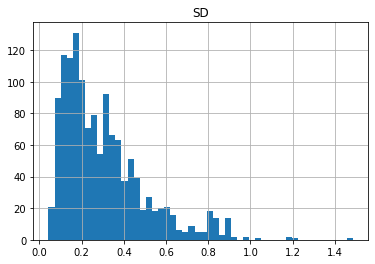

In [8]:
df_slope.hist(column='SD', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1058277b8>]],
      dtype=object)

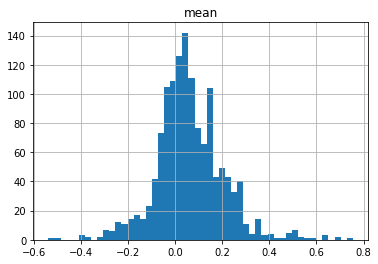

In [9]:
df_slope.hist(column='mean', bins = 50)

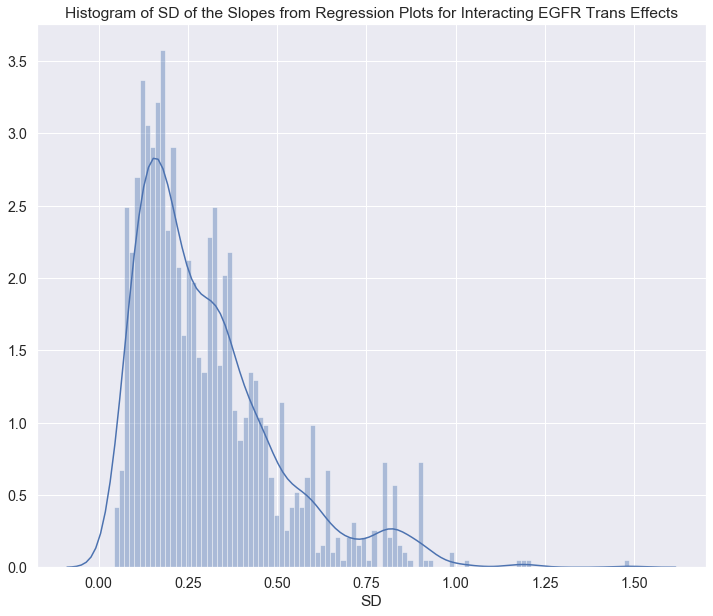

In [10]:
plt.rcParams["figure.figsize"] = (12,10)
sns.set(font_scale = 1.3)
a = sns.distplot(df_slope["SD"], bins = 100).set_title('Histogram of SD of the Slopes from Regression Plots for Interacting EGFR Trans Effects')

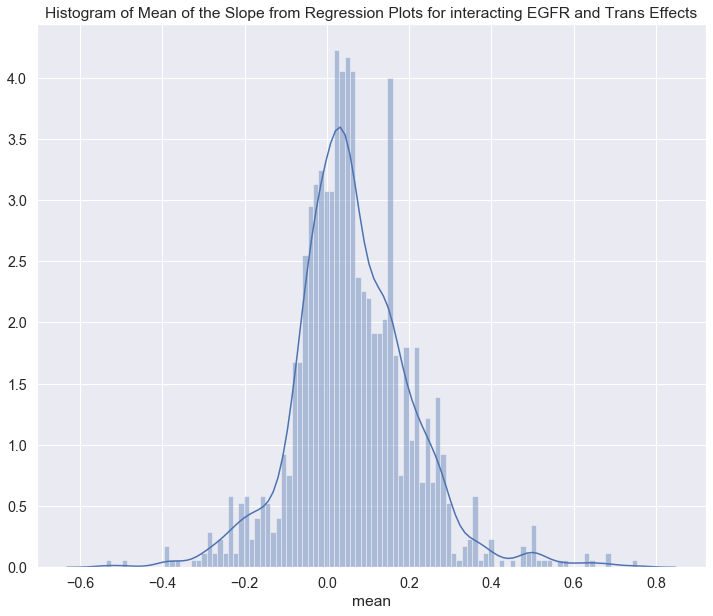

In [11]:
plt.rcParams["figure.figsize"] = (12,10)
sns.set(font_scale = 1.3)
a = sns.distplot(df_slope["mean"], bins = 100).set_title('Histogram of Mean of the Slope from Regression Plots for interacting EGFR and Trans Effects')

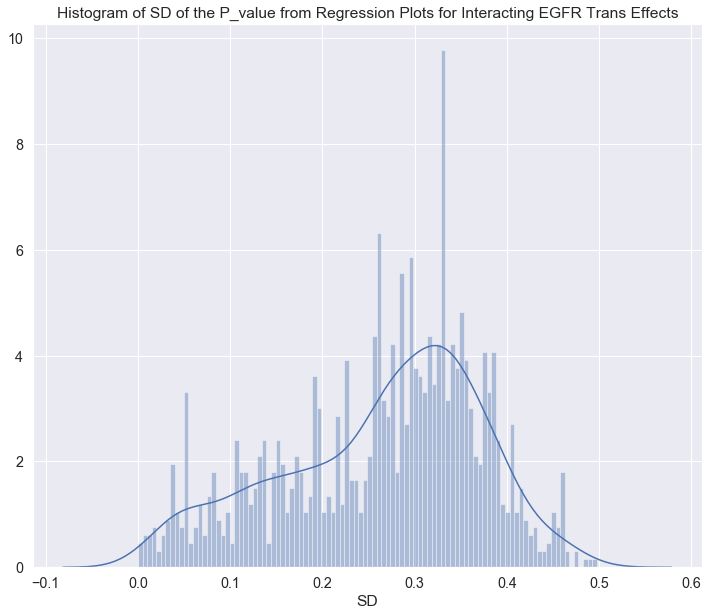

In [12]:
plt.rcParams["figure.figsize"] = (12,10)
sns.set(font_scale = 1.3)
a = sns.distplot(df_pvalue["SD"], bins = 100).set_title('Histogram of SD of the P_value from Regression Plots for Interacting EGFR Trans Effects')

In [13]:
df_other = pd.read_csv('pancan_EGFR_other.csv')
df_other = df_other.drop(['Unnamed: 0'], axis=1)
df_other

,Comparison,Slope_Gbm,R_squared_gbm,P_value_Gbm,Slope_kidney,R_squared_kidney,P_value_kidney,Slope_Endo,R_squared_Endo,P_value_Endo,...,P_value_Brca,Slope_Luad,R_squared_Luad,P_value_Luad,Slope_hnscc,R_squared_hnscc,P_value_hnscc,Slope_colon,R_squared_colon,P_value_colon
0,PHLDA1,0.536872,0.659114,9.317624e-27,0.189696,0.081886,5.235390e-05,0.304536,0.068441,0.001538,...,0.000190,0.236356,0.057995,0.001128,0.329068,0.217371,5.426160e-11,0.055226,1.808419e-03,7.407001e-01
1,SOCS2,0.290912,0.331202,5.912447e-11,-0.385206,0.599567,1.430341e-02,0.174235,0.019068,0.123080,...,NaN,NaN,NaN,NaN,0.022552,0.000824,8.121430e-01,NaN,NaN,NaN
2,GPRIN3,-0.196871,0.286043,2.089433e-09,-0.032602,0.005102,3.223231e-01,0.168797,0.048759,0.011583,...,0.262337,-0.136077,0.037954,0.004507,-0.145481,0.064261,2.510702e-03,0.183737,3.481000e-02,1.239463e-02
3,NFIA,0.234934,0.278873,3.609065e-09,0.241707,0.276612,3.410149e-15,0.052400,0.003222,0.499205,...,0.216394,NaN,NaN,NaN,-0.189774,0.080553,1.234413e-04,0.481289,1.874984e-01,5.423213e-10
4,MEOX2,0.293815,0.289387,1.114403e-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.209414,0.171806,2.336687e-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18272,GPX6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068721,7.938315e-04,9.426403e-01
18273,UGT2B15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033471,4.293094e-04,9.578051e-01
18274,ATP5G1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006282,9.149335e-06,9.663514e-01
18275,REG1B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005225,6.352281e-06,9.902506e-01


In [14]:
df_pvalue_other = df_other.loc[:,["Comparison","P_value_Gbm","P_value_kidney","P_value_Endo","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon"]]
df_pvalue_other= df_pvalue_other.dropna(thresh = 6)
df_pvalue_other["SD_other"] = (df_pvalue_other.loc[:,["Comparison","P_value_Gbm","P_value_kidney","P_value_Endo","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon"]].std(axis = 1))
df_pvalue_other.nlargest(10, 'SD_other')

#df_pvalue_other = df_other.loc[:,["Comparison","SD"]]
#df_pvalue = df_pvalue.loc[:,["Comparison","SD"]]
merged =  pd.concat([df_pvalue, df_pvalue_other], axis=1, sort=False)
merged

,Comparison,P_value_Gbm,P_value_kidney,P_value_Endo,P_value_Ovar,P_value_Brca,P_value_Luad,P_value_hnscc,P_value_colon,SD,Comparison,P_value_Gbm,P_value_kidney,P_value_Endo,P_value_Ovar,P_value_Brca,P_value_Luad,P_value_hnscc,P_value_colon,SD_other
0,GRB2,5.651892e-14,9.660917e-18,2.115855e-08,0.674800,0.057899,0.000007,1.112246e-05,7.473741e-06,0.236522,PHLDA1,9.317624e-27,5.235390e-05,0.001538,0.002761,0.000190,0.001128,5.426160e-11,7.407001e-01,0.261592
1,SOX9,5.382478e-09,2.405923e-03,2.296318e-01,0.442268,0.006389,NaN,3.570264e-02,1.067756e-04,0.171422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CDKN2C,8.399510e-08,2.460994e-33,7.108212e-01,0.000006,0.008360,NaN,2.130308e-07,2.897604e-15,0.268156,GPRIN3,2.089433e-09,3.223231e-01,0.011583,0.302755,0.262337,0.004507,2.510702e-03,1.239463e-02,0.150833
3,GAB1,3.690040e-07,3.084590e-10,8.917452e-01,0.000960,0.132903,NaN,1.267222e-04,1.789017e-10,0.332307,NFIA,3.609065e-09,3.410149e-15,0.499205,0.000112,0.216394,NaN,1.234413e-04,5.423213e-10,0.192713
4,DBI,4.209130e-07,2.362286e-15,6.552258e-05,0.289214,0.038234,NaN,1.103061e-06,3.558572e-02,0.106096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C15orf38-AP3S2,NaN,NaN,NaN,0.000359,0.419726,0.706253,7.296438e-06,2.572894e-11,0.324512
16839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CSRP3,NaN,NaN,NaN,0.000487,0.202607,0.016559,2.707548e-02,1.436547e-11,0.086432
16926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADAMTS16,NaN,NaN,NaN,0.035795,0.623446,0.001318,4.644106e-01,8.260754e-01,0.362881
17068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MS4A1,NaN,NaN,NaN,0.536251,0.429546,0.000023,1.192425e-02,5.296476e-02,0.256198


Text(0.5, 0, 'pvalue')

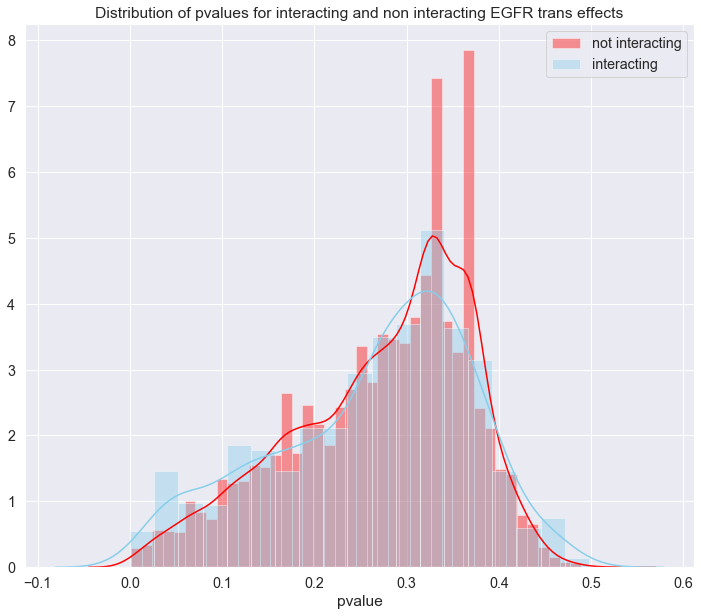

In [15]:
# Method 1: on the same Axis
sns.distplot( merged["SD_other"].dropna() , color="red", label="not interacting")
sns.distplot( merged["SD"].dropna() , color="skyblue", label="interacting")

plt.legend()

plt.title('Distribution of pvalues for interacting and non interacting EGFR trans effects')
plt.xlabel('pvalue')



In [22]:
df_slope_other = df_other.loc[:,["Comparison","Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc","Slope_colon"]]
df_slope_other= df_slope_other.dropna(thresh = 6)
df_slope_other["SD_other"] = (df_slope_other.loc[:,["Comparison","Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc","Slope_colon"]].std(axis = 1))
df_slope_other.nlargest(10, 'SD_other')

#df_pvalue_other = df_other.loc[:,["Comparison","SD"]]
#df_pvalue = df_pvalue.loc[:,["Comparison","SD"]]
merged2 =  pd.concat([df_slope, df_slope_other], axis=1, sort=False)
merged2

,Comparison,Slope_Gbm,Slope_kidney,Slope_Endo,Slope_Ovar,Slope_Brca,Slope_Luad,Slope_hnscc,Slope_colon,SD,...,Comparison,Slope_Gbm,Slope_kidney,Slope_Endo,Slope_Ovar,Slope_Brca,Slope_Luad,Slope_hnscc,Slope_colon,SD_other
0,GRB2,-0.163726,0.195011,-0.259424,-0.028630,-0.103359,-0.132149,-0.085705,0.293565,0.186898,...,PHLDA1,0.536872,0.189696,0.304536,0.840646,0.363866,0.236356,0.329068,0.055226,0.240078
1,SOX9,0.248300,0.198859,0.146958,0.127774,0.281249,NaN,0.100961,-0.442788,0.245628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CDKN2C,0.275173,0.506703,0.044002,0.748923,0.176449,NaN,-0.193515,0.847993,0.377751,...,GPRIN3,-0.196871,-0.032602,0.168797,0.131152,-0.063316,-0.136077,-0.145481,0.183737,0.152098
3,GAB1,0.142447,-0.175248,0.013304,0.485464,-0.077163,NaN,-0.148343,0.778368,0.358790,...,NFIA,0.234934,0.241707,0.052400,0.418724,-0.093636,NaN,-0.189774,0.481289,0.251864
4,DBI,0.181830,-0.648547,-0.252010,0.119505,0.159756,NaN,-0.216873,0.328938,0.340810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C15orf38-AP3S2,NaN,NaN,NaN,0.287457,0.041328,-0.012153,-0.120804,0.424876,0.225026
16839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CSRP3,NaN,NaN,NaN,0.832387,0.178556,-0.188958,-0.348485,1.884958,0.911386
16926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ADAMTS16,NaN,NaN,NaN,0.415245,0.117731,0.756418,0.241636,0.064897,0.279133
17068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MS4A1,NaN,NaN,NaN,-0.417125,0.112781,-0.486577,-0.276142,0.817138,0.537342


Text(0.5, 0, 'pvalue')

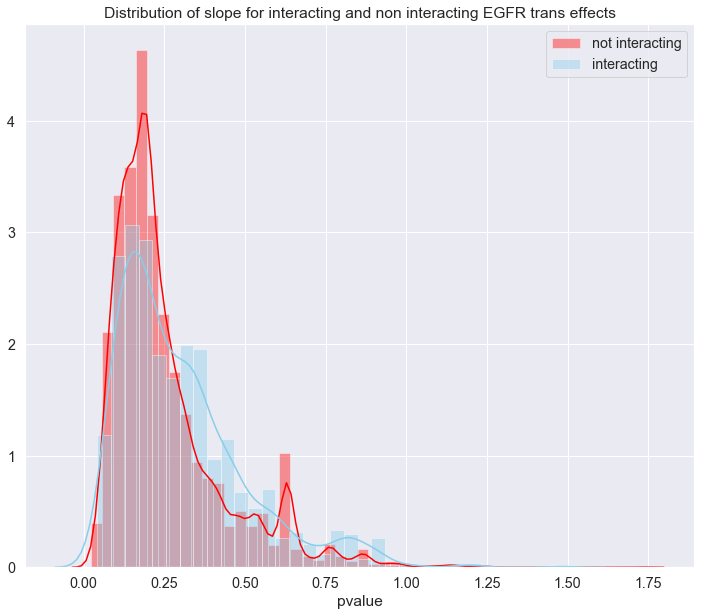

In [23]:
# Method 1: on the same Axis
sns.distplot( merged2["SD_other"].dropna() , color="red", label="not interacting")
sns.distplot( merged2["SD"].dropna() , color="skyblue", label="interacting")

plt.legend()

plt.title('Distribution of slope for interacting and non interacting EGFR trans effects')
plt.xlabel('pvalue')